In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score
from sklearn.ensemble import HistGradientBoostingClassifier

In [83]:
# Load the dataset
# Did a visual inspection, data cleaning, formatting, and filled in missing values of 8 and 16 in Product_ID in Excel.
df_products = pd.read_csv("/Users/gillianmondero/Downloads/productnew.csv") #Products Data
df_customers = pd.read_csv("/Users/gillianmondero/Downloads/customernew.csv") #Customers Data
df_transactions = pd.read_csv("/Users/gillianmondero/Downloads/transactionsnew.csv") #Transactions Data

In [85]:
# Check dataset structure
print(df.info())
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
Index: 9000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company_ID        8093 non-null   Int64         
 1   Product_ID        9000 non-null   Int64         
 2   Quantity          9000 non-null   float64       
 3   Transaction_Date  9000 non-null   datetime64[ns]
 4   Product_Price     9000 non-null   float64       
 5   Total_Cost        9000 non-null   float64       
 6   Log_Total_Cost    9000 non-null   float64       
dtypes: Int64(2), datetime64[ns](1), float64(4)
memory usage: 580.1 KB
None
    Company_ID  Product_ID  Quantity Transaction_Date  Product_Price  \
0           88           6       6.0       2024-03-26      194379.15   
1           29          19      15.0       2024-07-09       97930.99   
2           28          18       7.0       2024-04-13      126095.55   
3           85          12      10.0       2023-0

In [87]:
#Preprocessing Products Data
df = pd.read_csv("/Users/gillianmondero/Downloads/productnew.csv") #Products Data
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product_ID     20 non-null     int64 
 1   Product_Name   20 non-null     object
 2   Product_Price  20 non-null     object
dtypes: int64(1), object(2)
memory usage: 612.0+ bytes
None
   Product_ID            Product_Name Product_Price
0           1      FinPredictor Suite       140,000
1           2  MarketMinder Analytics       168,000
2           3    TrendWise Forecaster       100,800
3           4  CustomerScope Insights       123,200
4           5     SalesSync Optimizer        84,000


In [89]:
# Convert Product_Price to numerical format by removing commas and converting to integer
df['Product_Price'] = df['Product_Price'].str.replace(',', '').astype(int)
print(df.head(10))

   Product_ID                 Product_Name  Product_Price
0           1           FinPredictor Suite         140000
1           2       MarketMinder Analytics         168000
2           3         TrendWise Forecaster         100800
3           4       CustomerScope Insights         123200
4           5          SalesSync Optimizer          84000
5           6         RevenueVue Dashboard         179200
6           7  DataBridge Integration Tool         151200
7           8            RiskRadar Monitor         151200
8           9                    Product 9         112000
9          10           SegmentX Targeting          89600


In [91]:
df. to_csv('products_data.csv', index=False)

In [93]:
#Preprocessing Customers Data
df = pd.read_csv("/Users/gillianmondero/Downloads/customernew.csv") #Customers Data
print(df.info())
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company_ID      100 non-null    int64  
 1   Company_Name    100 non-null    object 
 2   Company_Profit  88 non-null     float64
 3   City            100 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.3+ KB
None
   Company_ID        Company_Name  Company_Profit         City
0           1    Tech Enterprises         80701.0        Pasig
1           2     Global Partners         80511.0       Taguig
2           3  Quantum Associates        110664.0        Pasig
3           4       Prime Network             NaN       Taguig
4           5      Elite Ventures         69427.0       Makati
5           6       Elite Network         36967.0        Davao
6           7   Dynamic Solutions         36661.0        Pasig
7           8   Green Enterprises        107952.0       

In [95]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values before handling:\n", missing_values)

Missing values before handling:
 Company_ID         0
Company_Name       0
Company_Profit    12
City               0
dtype: int64


In [97]:
# Fill missing values in 'Company_Profit' with the median
df['Company_Profit'] = df['Company_Profit'].fillna(df['Company_Profit'].median())

# Verify missing values are handled
missing_values_after = df.isnull().sum()
print("\nMissing values after handling:\n", missing_values_after)


Missing values after handling:
 Company_ID        0
Company_Name      0
Company_Profit    0
City              0
dtype: int64


In [99]:
# Check for duplicate entries
duplicate_rows = df.duplicated().sum()
print("\nNumber of duplicate rows before removal:", duplicate_rows)


Number of duplicate rows before removal: 0


In [101]:
# Outlier Detection using the IQR method
Q1 = df['Company_Profit'].quantile(0.25)
Q3 = df['Company_Profit'].quantile(0.75)
IQR = Q3 - Q1

# Defining outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = df[(df['Company_Profit'] < lower_bound) | (df['Company_Profit'] > upper_bound)]

# Display outliers found
print("\nNumber of outliers detected:", len(outliers))


Number of outliers detected: 0


In [103]:
df. to_csv('customers_data.csv', index=False)

In [105]:
#Preprocessing Transactions Data
df = pd.read_csv("/Users/gillianmondero/Downloads/transactionsnew.csv") #Transactions Data
print(df.info())
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    9000 non-null   float64
 1   Company_ID        9000 non-null   float64
 2   Product_ID        9000 non-null   float64
 3   Quantity          10000 non-null  object 
 4   Transaction_Date  10000 non-null  object 
 5   Product_Price     9000 non-null   float64
 6   Total_Cost        9000 non-null   float64
dtypes: float64(5), object(2)
memory usage: 547.0+ KB
None
   Transaction_ID  Company_ID  Product_ID Quantity Transaction_Date  \
0             1.0        88.0         6.0        6       26-03-2024   
1             2.0        29.0        19.0       15       09-07-2024   
2             NaN        28.0        18.0        7       13-04-2024   
3             4.0        85.0        12.0  #DIV/0!       06-09-2023   
4             5.0        47.0         3.0        7      

In [107]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values before handling:\n", missing_values)

Missing values before handling:
 Transaction_ID      1000
Company_ID          1000
Product_ID          1000
Quantity               0
Transaction_Date       0
Product_Price       1000
Total_Cost          1000
dtype: int64


In [109]:
# Drop the 'Transaction_ID' column
df.drop(columns=['Transaction_ID'], inplace=True)
print("Dropped 'Transaction_ID' column.")
print(df.head(), "\n")

Dropped 'Transaction_ID' column.
   Company_ID  Product_ID Quantity Transaction_Date  Product_Price  Total_Cost
0        88.0         6.0        6       26-03-2024      194379.15   1075200.0
1        29.0        19.0       15       09-07-2024       97930.99   1428000.0
2        28.0        18.0        7       13-04-2024      126095.55    940800.0
3        85.0        12.0  #DIV/0!       06-09-2023            NaN   1008000.0
4        47.0         3.0        7       06-07-2021       99575.61    705600.0 



In [111]:
# Convert 'Transaction_Date' to datetime format
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], format="%d-%m-%Y", errors='coerce')
print("Converted 'Transaction_Date' to datetime format. Sample Data:")
print(df[['Transaction_Date']].head())

Converted 'Transaction_Date' to datetime format. Sample Data:
  Transaction_Date
0       2024-03-26
1       2024-07-09
2       2024-04-13
3       2023-09-06
4       2021-07-06


In [113]:
# Convert data types
df['Company_ID'] = df['Company_ID'].astype('Int64')
df['Product_ID'] = df['Product_ID'].astype('Int64')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Product_Price'] = pd.to_numeric(df['Product_Price'], errors='coerce')
df['Total_Cost'] = pd.to_numeric(df['Total_Cost'], errors='coerce')
print("Converted numerical columns to appropriate data types.")
print(df.dtypes)

Converted numerical columns to appropriate data types.
Company_ID                   Int64
Product_ID                   Int64
Quantity                   float64
Transaction_Date    datetime64[ns]
Product_Price              float64
Total_Cost                 float64
dtype: object


In [115]:
# Clean the 'Quantity' column by converting it to numeric and handling errors
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
print("Step 3: Cleaned 'Quantity' column, converting to numeric.")
print(df[['Quantity']].head(), "\n")

Step 3: Cleaned 'Quantity' column, converting to numeric.
   Quantity
0       6.0
1      15.0
2       7.0
3       NaN
4       7.0 



In [117]:
# Fill missing 'Total_Cost' using 'Quantity * Product_Price'
df.loc[df['Total_Cost'].isna(), 'Total_Cost'] = df['Quantity'] * df['Product_Price']
print("Filled missing 'Total_Cost'")
print(df[['Quantity', 'Product_Price', 'Total_Cost']].head())

Filled missing 'Total_Cost'
   Quantity  Product_Price  Total_Cost
0       6.0      194379.15   1075200.0
1      15.0       97930.99   1428000.0
2       7.0      126095.55    940800.0
3       NaN            NaN   1008000.0
4       7.0       99575.61    705600.0


In [119]:
# Fill missing 'Product_Price' using 'Total_Cost / Quantity'
df.loc[df['Product_Price'].isna(), 'Product_Price'] = df['Total_Cost'] / df['Quantity']
print("Filled missing 'Product_Price")
print(df[['Quantity', 'Product_Price', 'Total_Cost']].head())

Filled missing 'Product_Price
   Quantity  Product_Price  Total_Cost
0       6.0      194379.15   1075200.0
1      15.0       97930.99   1428000.0
2       7.0      126095.55    940800.0
3       NaN            NaN   1008000.0
4       7.0       99575.61    705600.0


In [121]:
# Fill missing 'Quantity' using 'Total_Cost / Product_Price'
df.loc[df['Quantity'].isna(), 'Quantity'] = df['Total_Cost'] / df['Product_Price']
print("Filled missing 'Quantity")
print(df[['Quantity', 'Product_Price', 'Total_Cost']].head())

Filled missing 'Quantity
   Quantity  Product_Price  Total_Cost
0       6.0      194379.15   1075200.0
1      15.0       97930.99   1428000.0
2       7.0      126095.55    940800.0
3       NaN            NaN   1008000.0
4       7.0       99575.61    705600.0


In [123]:
# Impute missing values using median per 'Product_ID'
df['Quantity'] = df.groupby('Product_ID')['Quantity'].transform(lambda x: x.fillna(x.median()))
df['Product_Price'] = df.groupby('Product_ID')['Product_Price'].transform(lambda x: x.fillna(x.median()))
print("Imputed missing values using median per 'Product_ID")
print(df.head())

Imputed missing values using median per 'Product_ID
   Company_ID  Product_ID  Quantity Transaction_Date  Product_Price  \
0          88           6       6.0       2024-03-26      194379.15   
1          29          19      15.0       2024-07-09       97930.99   
2          28          18       7.0       2024-04-13      126095.55   
3          85          12      10.0       2023-09-06       83822.46   
4          47           3       7.0       2021-07-06       99575.61   

   Total_Cost  
0   1075200.0  
1   1428000.0  
2    940800.0  
3   1008000.0  
4    705600.0  


In [125]:
# Recalculate 'Total_Cost' and round to 2 decimal places
df['Total_Cost'] = (df['Quantity'] * df['Product_Price']).round(2)
print("Recalculated 'Total_Cost' using Quantity * Product_Price.")
print(df[['Quantity', 'Product_Price', 'Total_Cost']].head(), "\n")
missing_values_final = df.isna().sum()

Recalculated 'Total_Cost' using Quantity * Product_Price.
   Quantity  Product_Price  Total_Cost
0       6.0      194379.15  1166274.90
1      15.0       97930.99  1468964.85
2       7.0      126095.55   882668.85
3      10.0       83822.46   838224.60
4       7.0       99575.61   697029.27 



In [127]:
# Identify outliers using IQR method
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Quantity'] >= lower_bound) & (df['Quantity'] <= upper_bound)]
print("Removed outliers using IQR method. Updated Shape:", df.shape)

# Since 0 is above the lower bound (-12.5), it is not considered an outlier by standard statistical methods. It might represent as a cancellation or returns.

Removed outliers using IQR method. Updated Shape: (9000, 6)


In [129]:
# Apply log transformation to handle skewed data
df['Log_Total_Cost'] = np.log1p(df['Total_Cost'])

# Execute Results
print('Total_Cost')  
print(df[["Log_Total_Cost"]].head())

Total_Cost
   Log_Total_Cost
0       13.969326
1       14.200069
2       13.690707
3       13.639043
4       13.454584


In [131]:
# Prepare dataset for ML training
df_train = df.dropna(subset=['Company_ID', 'Product_ID'])
if len(df_train) > 5000:
    df_train = df_train.sample(5000, random_state=42)
X_train = df_train.drop(columns=['Company_ID', 'Product_ID', 'Transaction_Date']).fillna(0)
print("Prepared dataset for ML training.")
print(X_train.head(), "\n")

Prepared dataset for ML training.
      Quantity  Product_Price  Total_Cost  Log_Total_Cost
8716       9.0      123370.19  1110331.71       13.920170
9219       0.0      114952.05        0.00        0.000000
8610       4.0       84134.63   336538.52       12.726471
5443      14.0      115028.69  1610401.66       14.291995
1967      19.0       86606.91  1645531.29       14.313574 



In [133]:
# Train ML Model for Company_ID Prediction
y_train = df_train.loc[X_train.index, 'Company_ID']
model_company = HistGradientBoostingClassifier(max_depth=10, random_state=42)
model_company.fit(X_train, y_train)
print("Trained ML Model for Company_ID Prediction.")

Trained ML Model for Company_ID Prediction.


In [134]:
# Predict Missing Company_ID Values (Only if Missing)
missing_company_id_count = df['Company_ID'].isna().sum()

if missing_company_id_count > 0:
    X_predict = df[df['Company_ID'].isna()].drop(columns=['Company_ID', 'Product_ID', 'Transaction_Date']).fillna(0)

    if not X_predict.empty:  # Ensure we have rows before prediction
        df.loc[df['Company_ID'].isna(), 'Company_ID'] = model_company.predict(X_predict)
        print(f"Predicted missing 'Company_ID' for {missing_company_id_count} records.")
    else:
        print("No valid rows found for predicting 'Company_ID'.")
else:
    print("No missing 'Company_ID' values found. Skipping prediction step.")

# Check if there are missing Product_ID values before prediction
missing_product_id_count = df['Product_ID'].isna().sum()

if missing_product_id_count > 0:
    X_predict = df[df['Product_ID'].isna()].drop(columns=['Company_ID', 'Product_ID', 'Transaction_Date']).fillna(0)

    if not X_predict.empty:  # Ensure we have rows before prediction
        df.loc[df['Product_ID'].isna(), 'Product_ID'] = model_product.predict(X_predict)
        print(f"Predicted missing 'Product_ID' for {missing_product_id_count} records.")
    else:
        print("No valid rows found for predicting 'Product_ID'.")
else:
    print("No missing 'Product_ID' values found. Skipping prediction step.")

Predicted missing 'Company_ID' for 907 records.
No missing 'Product_ID' values found. Skipping prediction step.


In [135]:
# Final check for missing values
missing_values_final = df.isna().sum()
print("Final count of missing values:")
print(missing_values_final, "\n")

Final count of missing values:
Company_ID          0
Product_ID          0
Quantity            0
Transaction_Date    0
Product_Price       0
Total_Cost          0
Log_Total_Cost      0
dtype: int64 



In [141]:
df['Transaction_Date'] = df['Transaction_Date'].astype(str)
df.to_csv("transactions_data.csv", index=False)

In [143]:
# File paths
customers_file = "/Users/gillianmondero/customers_data.csv"
transactions_file = "/Users/gillianmondero/transactions_data.csv"
products_file = "/Users/gillianmondero/products_data.csv"

# Load data
customers_df = pd.read_csv("/Users/gillianmondero/customers_data.csv")
transactions_df = pd.read_csv("/Users/gillianmondero/transactions_data.csv")
products_df = pd.read_csv("/Users/gillianmondero/products_data.csv")

In [145]:
# Merge transactions with customers on Company_ID
merged_df = transactions_df.merge(customers_df, on="Company_ID", how="left")

# Merge the result with products on Product_ID
merged_df = merged_df.merge(products_df, on="Product_ID", how="left")

# Display the first few rows of the merged dataset
merged_df.head()

,Company_ID,Product_ID,Quantity,Transaction_Date,Product_Price_x,Total_Cost,Log_Total_Cost,Company_Name,Company_Profit,City,Product_Name,Product_Price_y
0,88,6,6.0,2024-03-26,194379.15,1166274.90,13.969326,Elite Consulting,75950.0,Taguig,RevenueVue Dashboard,179200
1,29,19,15.0,2024-07-09,97930.99,1468964.85,14.200069,Sky Industries,61952.0,Makati,EcoNomix Modeler,95200
2,28,18,7.0,2024-04-13,126095.55,882668.85,13.690707,Global Holdings,61115.0,Taguig,DashSync Analytics Hub,134400
3,85,12,10.0,2023-09-06,83822.46,838224.60,13.639043,Green Ventures,113470.0,Cebu,BudgetMaster Pro,84000
4,47,3,7.0,2021-07-06,99575.61,697029.27,13.454584,Green Industries,31130.0,Mandaluyong,TrendWise Forecaster,100800


In [147]:
# Identifying duplicate rows
duplicates = merged_df[merged_df.duplicated()]

# Displaying duplicate rows
duplicates

,Company_ID,Product_ID,Quantity,Transaction_Date,Product_Price_x,Total_Cost,Log_Total_Cost,Company_Name,Company_Profit,City,Product_Name,Product_Price_y
8861,65,6,10.0,2022-06-13,179229.665,1792296.65,14.399009,Tech Associates,51705.0,Parañaque,RevenueVue Dashboard,179200


In [149]:
# Remove duplicate entries, keeping only the first occurrence
merged_df = merged_df.drop_duplicates()

# Verify if duplicates are removed
duplicate_count_after = merged_df.duplicated().sum()
duplicate_count_after

0

In [151]:
# Convert Transaction_Date to datetime and display result
df["Transaction_Date"] = pd.to_datetime(df["Transaction_Date"])
print("Converted Transaction_Date to datetime format.\n")
print(df["Transaction_Date"].head())

Converted Transaction_Date to datetime format.

0   2024-03-26
1   2024-07-09
2   2024-04-13
3   2023-09-06
4   2021-07-06
Name: Transaction_Date, dtype: datetime64[ns]


In [221]:
# Create target variable Purchased based on Log_Total_Cost
print("Creating Purchased target variable based on Log_Total_Cost")
df["Log_Total_Cost"] = np.log1p(df["Total_Cost"])  # Log transform to handle skewness
threshold = df["Log_Total_Cost"].quantile(0.50)  # Median threshold for classification
df["Purchased"] = (df["Log_Total_Cost"] > threshold).astype(int)
print(df[["Log_Total_Cost", "Purchased"]].head())

Creating Purchased target variable based on Log_Total_Cost
   Log_Total_Cost  Purchased
0       13.969326          0
1       14.200069          1
2       13.690707          0
3       13.639043          0
4       13.454584          0


In [160]:
# Extract temporal features and display result
df["Year"] = df["Transaction_Date"].dt.year
df["Month"] = df["Transaction_Date"].dt.month
df["Day"] = df["Transaction_Date"].dt.day
print("\nExtracted temporal features: Year, Month, Day.\n")
print(df[["Transaction_Date", "Year", "Month", "Day"]].head())


Extracted temporal features: Year, Month, Day.

  Transaction_Date  Year  Month  Day
0       2024-03-26  2024      3   26
1       2024-07-09  2024      7    9
2       2024-04-13  2024      4   13
3       2023-09-06  2023      9    6
4       2021-07-06  2021      7    6


In [155]:
# Calculate Recency (days since last purchase) and display result
df["Recency"] = (df["Transaction_Date"].max() - df["Transaction_Date"]).dt.days
print("\nCalculated Recency (days since last purchase).\n")
print(df[["Transaction_Date", "Recency"]].head())


Calculated Recency (days since last purchase).

  Transaction_Date  Recency
0       2024-03-26      259
1       2024-07-09      154
2       2024-04-13      241
3       2023-09-06      461
4       2021-07-06     1253


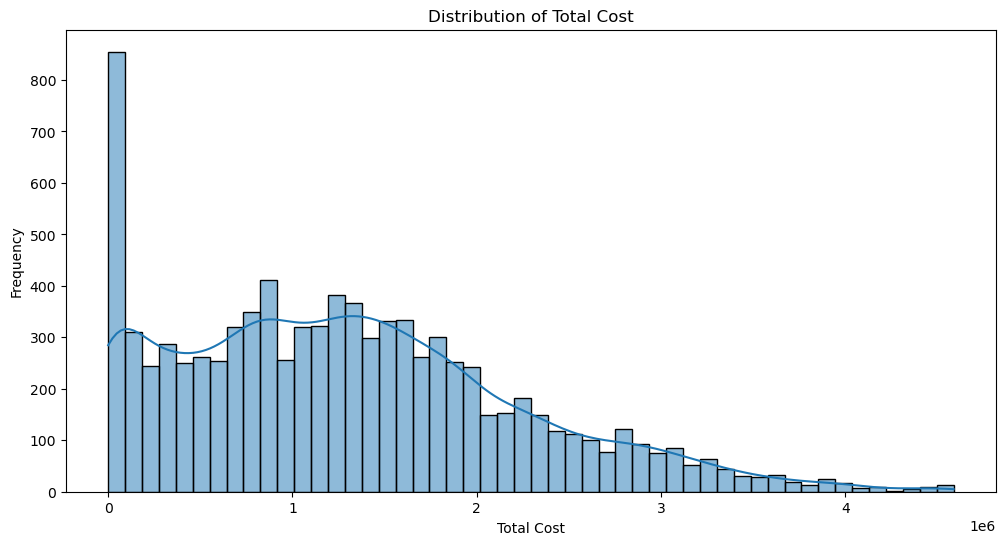

In [213]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
sns.histplot(df["Total_Cost"], bins=50, kde=True)
plt.title("Distribution of Total Cost")
plt.xlabel("Total Cost")
plt.ylabel("Frequency")
plt.show()

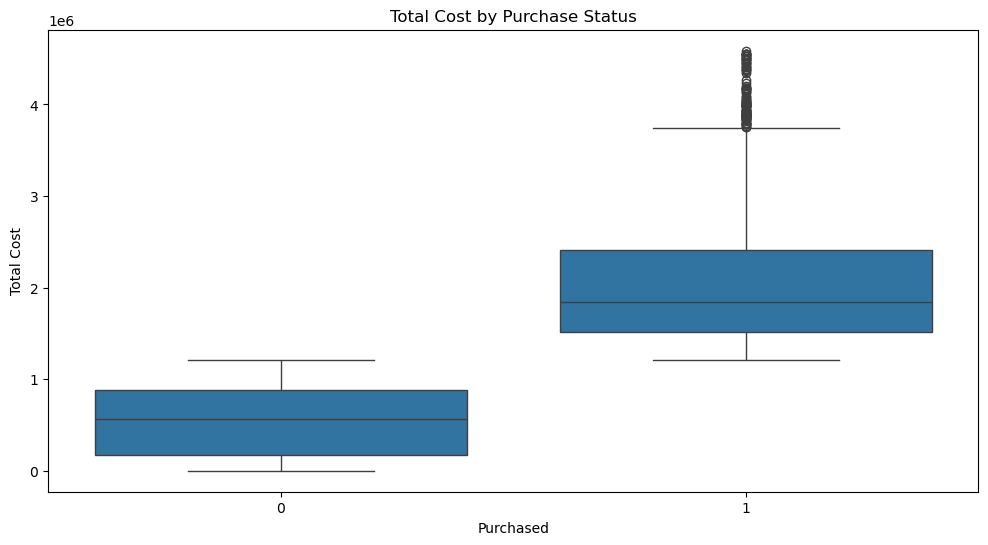

In [185]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Purchased"], y=df["Total_Cost"])
plt.title("Total Cost by Purchase Status")
plt.xlabel("Purchased")
plt.ylabel("Total Cost")
plt.show()

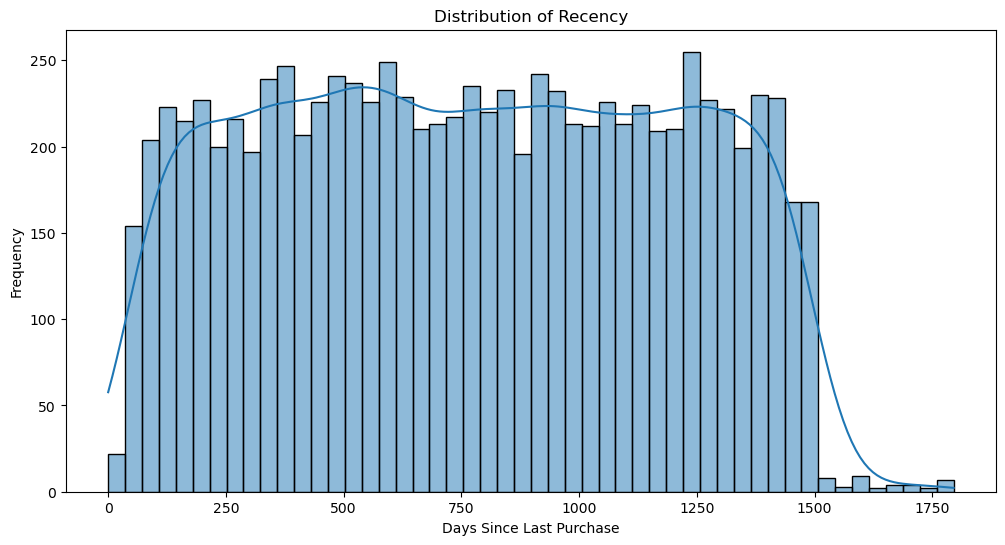

In [187]:
plt.figure(figsize=(12, 6))
sns.histplot(df["Recency"], bins=50, kde=True)
plt.title("Distribution of Recency")
plt.xlabel("Days Since Last Purchase")
plt.ylabel("Frequency")
plt.show()

In [195]:
# Aggregate Customer-Level Features
print("Aggregating customer transaction features...")
detailed_customer_features = df.groupby("Company_ID").agg(
    Total_Purchases=("Purchased", "sum"),
    Total_Spend=("Total_Cost", "sum"),
    Avg_Spend=("Total_Cost", "mean"),
    Purchase_Frequency=("Purchased", "mean"),
    Avg_Quantity=("Quantity", "mean"),
    Avg_Product_Price=("Product_Price", "mean"),
    Last_Purchase=("Recency", "min"),
    First_Purchase=("Recency", "max"),
    Purchase_Recency_Avg=("Recency", "mean")
).fillna(0)
detailed_customer_features.reset_index(inplace=True)
print(detailed_customer_features.head())

Aggregating customer transaction features...
   Company_ID  Total_Purchases   Total_Spend     Avg_Spend  \
0           1               36  8.414649e+07  1.185162e+06   
1           2               43  9.999352e+07  1.298617e+06   
2           3               39  1.090833e+08  1.160461e+06   
3           4               39  1.208694e+08  1.246077e+06   
4           5               43  1.093076e+08  1.214529e+06   

   Purchase_Frequency  Avg_Quantity  Avg_Product_Price  Last_Purchase  \
0            0.507042      8.957746      137437.510282             50   
1            0.558442      9.311688      143101.146234             66   
2            0.414894      9.090426      124160.105213              6   
3            0.402062      8.381443      144577.579021             91   
4            0.477778      9.094444      132703.857111             46   

   First_Purchase  Purchase_Recency_Avg  
0            1612            707.690141  
1            1487            824.155844  
2            1487

In [197]:
# Modify Non-Purchasing Customer Identification
print("Modifying non-purchasing customer identification...")
thresh_cost = detailed_customer_features["Total_Spend"].quantile(0.10)  # Bottom 10% as non-purchasers
detailed_customer_features["Purchased"] = (detailed_customer_features["Total_Spend"] > thresh_cost).astype(int)
print(detailed_customer_features[["Total_Spend", "Purchased"]].head())

Modifying non-purchasing customer identification...
    Total_Spend  Purchased
0  8.414649e+07          0
1  9.999352e+07          1
2  1.090833e+08          1
3  1.208694e+08          1
4  1.093076e+08          1


In [199]:
# Check Final Balanced Dataset
print("Checking Final Balanced Dataset...")
print(detailed_customer_features["Purchased"].value_counts(normalize=True))

Checking Final Balanced Dataset...
Purchased
1    0.9
0    0.1
Name: proportion, dtype: float64


In [201]:
# Train Decision Tree and SVM Models with Cross-Validation
print("Training Decision Tree and SVM Models with Cross-Validation...")
X = detailed_customer_features.drop(columns=["Company_ID", "Total_Purchases", "Purchased"])
y = detailed_customer_features["Purchased"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Training Decision Tree and SVM Models with Cross-Validation...


In [203]:
# Train Decision Tree Model
print("Training Decision Tree Model...")
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_scaled, y)

Training Decision Tree Model...


DecisionTreeClassifier(random_state=42)

In [205]:
# Train SVM Model
print("Training SVM Model...")
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_scaled, y)

Training SVM Model...


SVC(kernel='linear', probability=True, random_state=42)

In [207]:
# Evaluate Models
print("Evaluating Models...")
y_pred_tree = tree_model.predict(X_scaled)
y_pred_svm = svm_model.predict(X_scaled)

tree_f1 = f1_score(y, y_pred_tree)
tree_roc_auc = roc_auc_score(y, tree_model.predict_proba(X_scaled)[:, 1])

svm_f1 = f1_score(y, y_pred_svm)
svm_roc_auc = roc_auc_score(y, svm_model.predict_proba(X_scaled)[:, 1])

print(f"Decision Tree - F1 Score: {tree_f1:.2f}, ROC-AUC Score: {tree_roc_auc:.2f}")
print(f"SVM - F1 Score: {svm_f1:.2f}, ROC-AUC Score: {svm_roc_auc:.2f}")

print("Model is ready for customer prediction")

Evaluating Models...
Decision Tree - F1 Score: 1.00, ROC-AUC Score: 1.00
SVM - F1 Score: 0.99, ROC-AUC Score: 1.00
Model is ready for customer prediction


In [209]:
# Function to Predict Customer's Purchasing Likelihood
def predict_customer_purchase(customer_data):
    """ Predicts the purchasing likelihood for a new customer. """
    print("Scaling new customer data...")
    customer_df = pd.DataFrame([customer_data])
    customer_scaled = scaler.transform(customer_df)
    
    print("Predicting using Decision Tree...")
    tree_pred = tree_model.predict(customer_scaled)
    tree_prob = tree_model.predict_proba(customer_scaled)[:, 1]
    
    print("Predicting using SVM...")
    svm_pred = svm_model.predict(customer_scaled)
    svm_prob = svm_model.predict_proba(customer_scaled)[:, 1]
    
    return {
        "Decision_Tree": {"Prediction": int(tree_pred[0]), "Probability": float(tree_prob[0])},
        "SVM": {"Prediction": int(svm_pred[0]), "Probability": float(svm_prob[0])}
    }

In [217]:
# Select a sample from the dataset
sample_index = np.random.randint(0, len(X))  # Select a random index
test_data = X.iloc[sample_index].to_dict()  # Convert the row to a dictionary

# Predict using the real sample
prediction_result = predict_customer_purchase(test_data)

# Display the prediction results
print("Prediction Results:")
print(f"Decision Tree - Purchase Prediction: {prediction_result['Decision_Tree']['Prediction']}, "
      f"Probability: {prediction_result['Decision_Tree']['Probability']:.2f}")
print(f"SVM - Purchase Prediction: {prediction_result['SVM']['Prediction']}, "
      f"Probability: {prediction_result['SVM']['Probability']:.2f}")

Scaling new customer data...
Predicting using Decision Tree...
Predicting using SVM...
Prediction Results:
Decision Tree - Purchase Prediction: 0, Probability: 0.00
SVM - Purchase Prediction: 0, Probability: 0.24
